In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_files
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nouran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nouran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nouran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nouran\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
# Load data
data = load_files('C:/Users/Nouran/OneDrive/Desktop/20_newsgroups', shuffle=True, encoding='utf-8', decode_error='replace')
X , y = data.data, data.target

In [3]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
def preprocess_text(text):
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [5]:
#remove_punctuation
import string
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [6]:
# toknize data
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens

In [7]:
# remove_stopwords
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
   output= [i for i in text if i not in stopwords]
   return output

In [8]:
# stemming
porter_stemmer = PorterStemmer()

def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

In [9]:
# stemming 2
porter_stemmer = SnowballStemmer(language = 'english')

def stemming_snow(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

In [10]:
#Pos_tag
def wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif pos_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif pos_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif pos_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return nltk.corpus.wordnet.NOUN

In [11]:
#lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
    tagged_text = nltk.pos_tag(text)  # Perform POS tagging
    lemm_text = [wordnet_lemmatizer.lemmatize(word, pos=wordnet_pos(pos_tag)) for word, pos_tag in tagged_text]
    return lemm_text

In [12]:
#remove_numeric
def remove_numeric(text):
   output= [i for i in text if not i.isnumeric()]
   return output

In [13]:
X_train = [preprocess_text(x) for x in X_train]

X_train = [remove_punctuation(x) for x in X_train]

#make all word lower case
X_train = [x.lower() for x in X_train]


X_train = [tokenization(x) for x in X_train]



X_train = [remove_stopwords(x) for x in X_train]



X_train = [stemming(x) for x in X_train]

#X_train = [stemming_snow(x) for x in X_train]


X_train = [lemmatizer(x) for x in X_train]

X_train = [remove_numeric(x) for x in X_train]

#convert list to string
X_train = [" ".join(x) for x in X_train]


#X_train_df = pd.DataFrame(X_train)
#X_train_df

In [14]:
X_test = [preprocess_text(x) for x in X_test]

X_test = [remove_punctuation(x) for x in X_test]
#make all word lower case
X_test = [x.lower() for x in X_test]

X_test = [tokenization(x) for x in X_test]



X_test = [remove_stopwords(x) for x in X_test]


X_test = [stemming(x) for x in X_test]

#X_test = [stemming_snow(x) for x in X_test]


X_test = [lemmatizer(x) for x in X_test]
X_test = [remove_numeric(x) for x in X_test]

#convert list to string
X_test = [" ".join(x) for x in X_test]

#X_test_df = pd.DataFrame(X_test)
#X_test_d

In [15]:
# apply the vectorizer
vectorizer = TfidfVectorizer()
nlp = vectorizer.fit_transform(X_train)
#nlp = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())
nlp

<15997x175358 sparse matrix of type '<class 'numpy.float64'>'
	with 1866058 stored elements in Compressed Sparse Row format>

In [16]:
# apply the vectorizer
nlp_test = vectorizer.transform(X_test)
#nlp_test = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())
nlp_test

<4000x175358 sparse matrix of type '<class 'numpy.float64'>'
	with 440851 stored elements in Compressed Sparse Row format>

In [17]:
# KNN Classification Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(nlp, y_train)
KNeighborsClassifier(n_neighbors=3)


KNeighborsClassifier(n_neighbors=3)

In [18]:
'''prediction_on_training_data = knn.predict(nlp)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)
f1Score = f1_score(y_train, prediction_on_training_data, average='macro')
precision = precision_score(y_train, prediction_on_training_data, average='macro')
recall = recall_score(y_train, prediction_on_training_data, average='macro')
print(f"accurecy of test data = {accuracy_on_training_data}")
print(f"F1 score of test data = {f1Score}")
print(f"precision of test data = {precision}")
print(f"reacall of test data = {recall}")'''

'prediction_on_training_data = knn.predict(nlp)\naccuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)\nf1Score = f1_score(y_train, prediction_on_training_data, average=\'macro\')\nprecision = precision_score(y_train, prediction_on_training_data, average=\'macro\')\nrecall = recall_score(y_train, prediction_on_training_data, average=\'macro\')\nprint(f"accurecy of test data = {accuracy_on_training_data}")\nprint(f"F1 score of test data = {f1Score}")\nprint(f"precision of test data = {precision}")\nprint(f"reacall of test data = {recall}")'

In [19]:
prediction_on_test_data = knn.predict(nlp_test)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)
f1Score = f1_score(y_test, prediction_on_test_data, average='macro')
precision = precision_score(y_test, prediction_on_test_data, average='macro')
recall = recall_score(y_test, prediction_on_test_data, average='macro')
print(f"KNN accuracy of test data = {accuracy_on_test_data}")
print(f"KNN F1 score of test data = {f1Score}")
print(f"KNN precision of test data = {precision}")
print(f"KNN reacall of test data = {recall}")

KNN accuracy of test data = 0.833
KNN F1 score of test data = 0.8333675500244813
KNN precision of test data = 0.8355029651835135
KNN reacall of test data = 0.8353292402425978


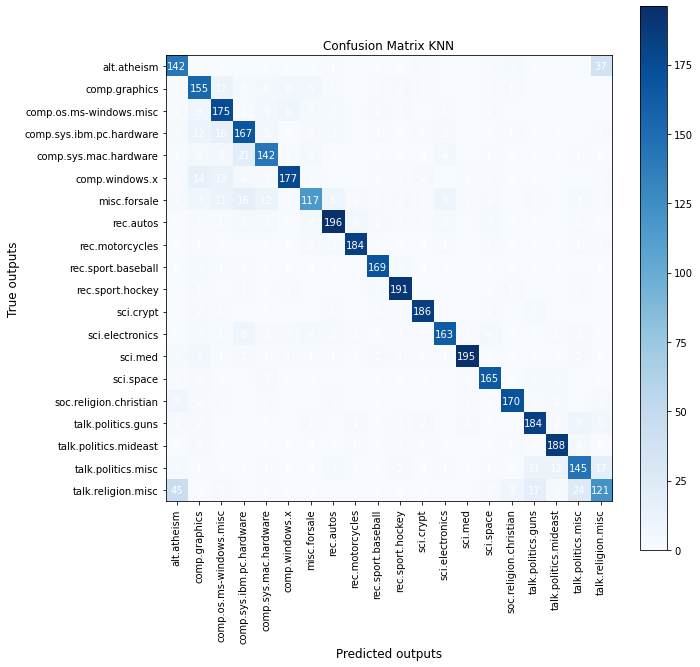

In [20]:
confusion_mat_KNN = confusion_matrix(y_test, prediction_on_test_data)

# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion_mat_KNN, cmap='Blues')

ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('True outputs', fontsize=12, color='black')
ax.set_xticks(np.arange(len(data.target_names)))
ax.set_yticks(np.arange(len(data.target_names)))
ax.set_xticklabels(data.target_names, rotation=90)
ax.set_yticklabels(data.target_names)

# Add text annotations
for i in range(len(data.target_names)):
    for j in range(len(data.target_names)):
        text = ax.text(j, i, confusion_mat_KNN[i, j], ha="center", va="center", color="white")

ax.set_title("Confusion Matrix KNN")
fig.colorbar(im)
plt.show()

In [21]:
from sklearn.svm import LinearSVC
# Train and evaluate a Support Vector Machine classifier
clf_svm = LinearSVC(C=1.0, max_iter=100000)
clf_svm.fit(nlp, y_train)
y_pred_svm = clf_svm.predict(nlp_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1Score = f1_score(y_test, y_pred_svm, average='macro')
precision = precision_score(y_test, y_pred_svm, average='macro')
recall = recall_score(y_test, y_pred_svm, average='macro')
print(f"SVM accuracy of test data = {accuracy_svm}")
print(f"SVM F1 score of test data = {f1Score}")
print(f"SVM precision of test data = {precision}")
print(f"SVM reacall of test data = {recall}")

SVM accuracy of test data = 0.93975
SVM F1 score of test data = 0.9408865853664825
SVM precision of test data = 0.9409287709367045
SVM reacall of test data = 0.9409930682612455


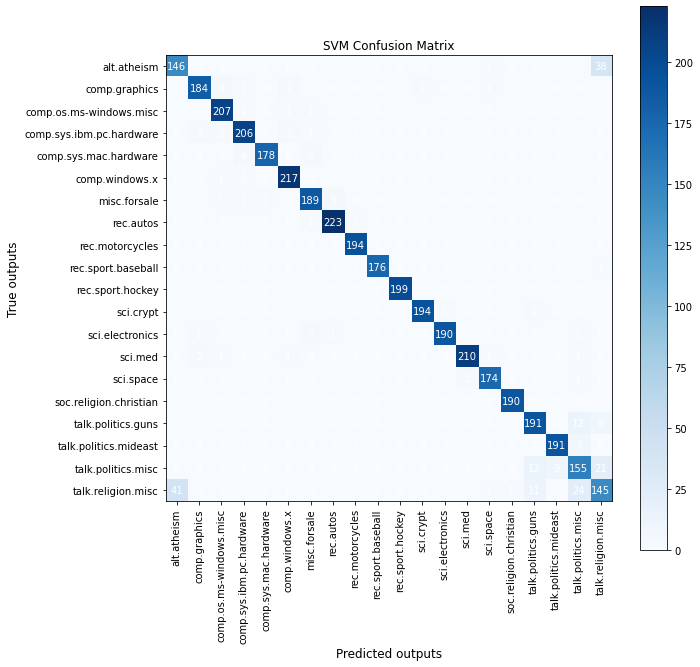

In [22]:
confusion_mat_svm = confusion_matrix(y_test, y_pred_svm)

# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion_mat_svm, cmap='Blues')

ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('True outputs', fontsize=12, color='black')
ax.set_xticks(np.arange(len(data.target_names)))
ax.set_yticks(np.arange(len(data.target_names)))
ax.set_xticklabels(data.target_names, rotation=90)
ax.set_yticklabels(data.target_names)

# Add text annotations
for i in range(len(data.target_names)):
    for j in range(len(data.target_names)):
        text = ax.text(j, i, confusion_mat_svm[i, j], ha="center", va="center", color="white")

ax.set_title("SVM Confusion Matrix")
fig.colorbar(im)
plt.show()

In [23]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(nlp, y_train)
y_pred = clf.predict(nlp_test)

accuracy_DT = accuracy_score(y_test, y_pred)
f1Score = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"DT accuracy of test data = {accuracy_DT}")
print(f"DT F1 score of test data = {f1Score}")
print(f"DT precision of test data = {precision}")
print(f"DT reacall of test data = {recall}")

DT accuracy of test data = 0.87675
DT F1 score of test data = 0.8787829161084136
DT precision of test data = 0.8786273215907408
DT reacall of test data = 0.8797330343432435


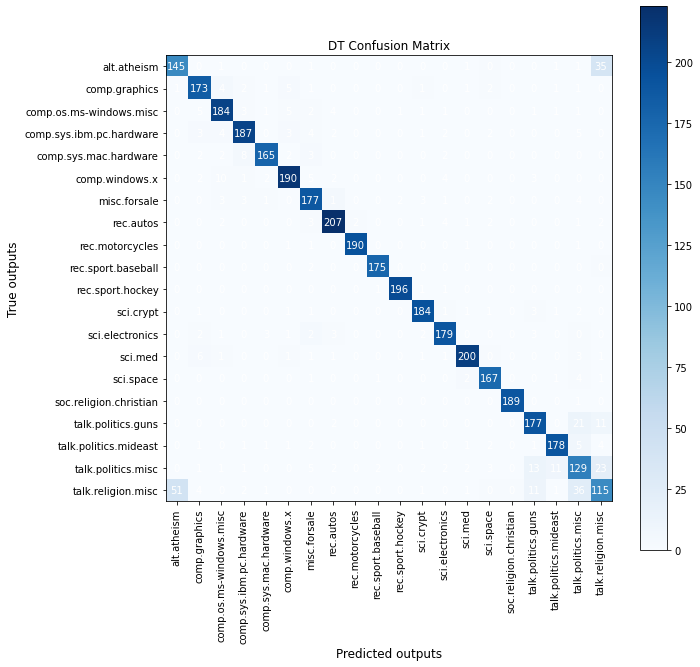

In [24]:
confusion_mat_DT = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion_mat_svm, cmap='Blues')

ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('True outputs', fontsize=12, color='black')
ax.set_xticks(np.arange(len(data.target_names)))
ax.set_yticks(np.arange(len(data.target_names)))
ax.set_xticklabels(data.target_names, rotation=90)
ax.set_yticklabels(data.target_names)

# Add text annotations
for i in range(len(data.target_names)):
    for j in range(len(data.target_names)):
        text = ax.text(j, i, confusion_mat_DT[i, j], ha="center", va="center", color="white")

ax.set_title("DT Confusion Matrix")
fig.colorbar(im)
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest Classifier
#rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt')
rf_classifier = RandomForestClassifier(n_estimators=100)

In [26]:
# Train the Random Forest Classifier
rf_classifier.fit(nlp, y_train)
# Make predictions on the test set
predictions = rf_classifier.predict(nlp_test)

In [27]:
prediction_on_test_data = rf_classifier.predict(nlp_test)
accuracy_on_test_data = accuracy_score(y_test, predictions)
f1Score = f1_score(y_test, predictions, average='macro')
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')

print(f"Random Forest accuracy of test data = {accuracy_on_test_data}")
print(f"Random Forest F1 score of test data = {f1Score}")
print(f"Random Forest precision of test data = {precision}")
print(f"Random Forest reacall of test data = {recall}")

Random Forest accuracy of test data = 0.9185
Random Forest F1 score of test data = 0.9191371669763024
Random Forest precision of test data = 0.9186039675610292
Random Forest reacall of test data = 0.9206956200193609


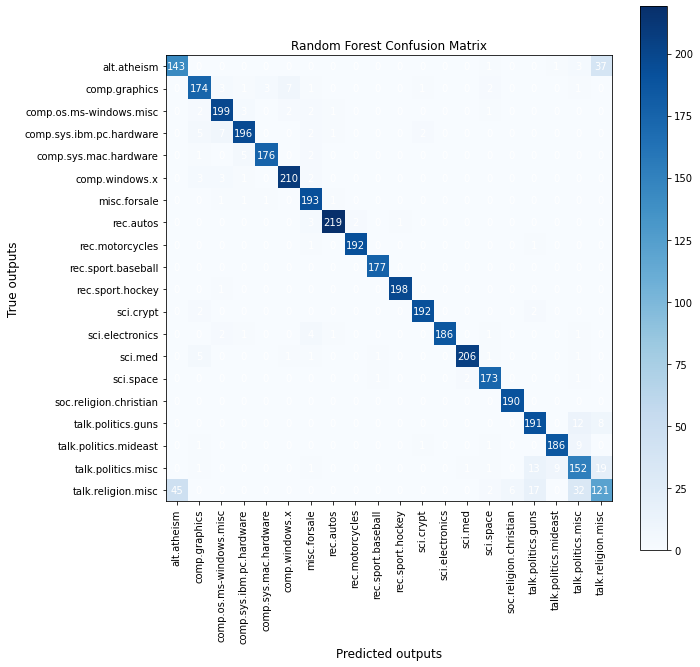

In [28]:
confusion_mat_RF = confusion_matrix(y_test, predictions)

# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion_mat_RF, cmap='Blues')

ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('True outputs', fontsize=12, color='black')
ax.set_xticks(np.arange(len(data.target_names)))
ax.set_yticks(np.arange(len(data.target_names)))
ax.set_xticklabels(data.target_names, rotation=90)
ax.set_yticklabels(data.target_names)

# Add text annotations
for i in range(len(data.target_names)):
    for j in range(len(data.target_names)):
        text = ax.text(j, i, confusion_mat_RF[i, j], ha="center", va="center", color="white")

ax.set_title("Random Forest Confusion Matrix")
fig.colorbar(im)
plt.show()

In [29]:
#LogisticRegression
model = LogisticRegression()
model.fit(nlp, y_train)


C:\Users\Nouran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
'''prediction_on_training_data = model.predict(nlp)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)
f1Score = f1_score(y_train, prediction_on_training_data, average='macro')
precision = precision_score(y_train, prediction_on_training_data, average='macro')
recall = recall_score(y_train, prediction_on_training_data, average='macro')
print(f"accurecy of test data = {accuracy_on_training_data}")
print(f"F1 score of test data = {f1Score}")
print(f"precision of test data = {precision}")
print(f"recall of test data = {recall}")'''

'prediction_on_training_data = model.predict(nlp)\naccuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)\nf1Score = f1_score(y_train, prediction_on_training_data, average=\'macro\')\nprecision = precision_score(y_train, prediction_on_training_data, average=\'macro\')\nrecall = recall_score(y_train, prediction_on_training_data, average=\'macro\')\nprint(f"accurecy of test data = {accuracy_on_training_data}")\nprint(f"F1 score of test data = {f1Score}")\nprint(f"precision of test data = {precision}")\nprint(f"recall of test data = {recall}")'

In [31]:
prediction_on_test_data = model.predict(nlp_test)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)
f1Score = f1_score(y_test, prediction_on_test_data, average='macro')
precision = precision_score(y_test, prediction_on_test_data, average='macro')
recall = recall_score(y_test, prediction_on_test_data, average='macro')

print(f"Logistic Regression accuracy of test data = {accuracy_on_test_data}")
print(f"Logistic Regression F1 score of test data = {f1Score}")
print(f"Logistic Regression precision of test data = {precision}")
print(f"Logistic Regression reacall of test data = {recall}")

Logistic Regression accuracy of test data = 0.934
Logistic Regression F1 score of test data = 0.9351731911325245
Logistic Regression precision of test data = 0.9355451384040974
Logistic Regression reacall of test data = 0.9351114147066898


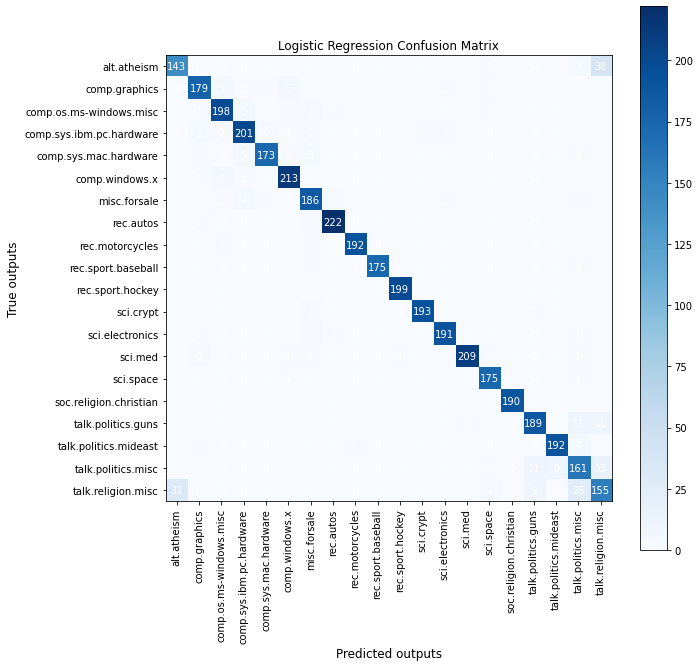

In [32]:
confusion_mat_log = confusion_matrix(y_test, prediction_on_test_data)

# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion_mat_log, cmap='Blues')

ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('True outputs', fontsize=12, color='black')
ax.set_xticks(np.arange(len(data.target_names)))
ax.set_yticks(np.arange(len(data.target_names)))
ax.set_xticklabels(data.target_names, rotation=90)
ax.set_yticklabels(data.target_names)

# Add text annotations
for i in range(len(data.target_names)):
    for j in range(len(data.target_names)):
        text = ax.text(j, i, confusion_mat_log[i, j], ha="center", va="center", color="white")

ax.set_title("Logistic Regression Confusion Matrix")
fig.colorbar(im)
plt.show()